In [1]:
# Perso
import sys
sys.path.append('/home/hugoperrin/Bureau/X/Cours/Data_camp/mars_craters/perso/')
from object_detector import *

import numpy as np
import pandas as pd

# Model path
model_path = "/home/hugoperrin/Bureau/X/Cours/Data_camp/mars_craters/perso/models/craters_9.model"

device = 'cuda:0'

# Data
Xtest = torch.tensor(np.load('/home/hugoperrin/Bureau/X/Cours/Data_camp/mars_craters/data/data_test_mini.npy'))
Ytest = torch.tensor(pd.read_csv('/home/hugoperrin/Bureau/X/Cours/Data_camp/mars_craters/data/labels_test_mini.csv').values)

In [2]:
object_detector = ObjectDetector()
object_detector.net.load_state_dict(torch.load(model_path))

Creating neural network on GPU...done

>> Learning: 22982896 parameters



In [3]:
data = CraterDataset(Xtest, 8, Ytest)

In [80]:
for X, idx in data.loader:
    break

In [109]:
image_idx = 6

In [110]:
current_label_idx = idx[image_idx]
true_circles = data.Ytrain[data.Ytrain[:, 0] == current_label_idx, 1:4]

tensor([[134.0000, 122.0000,   8.2500]])

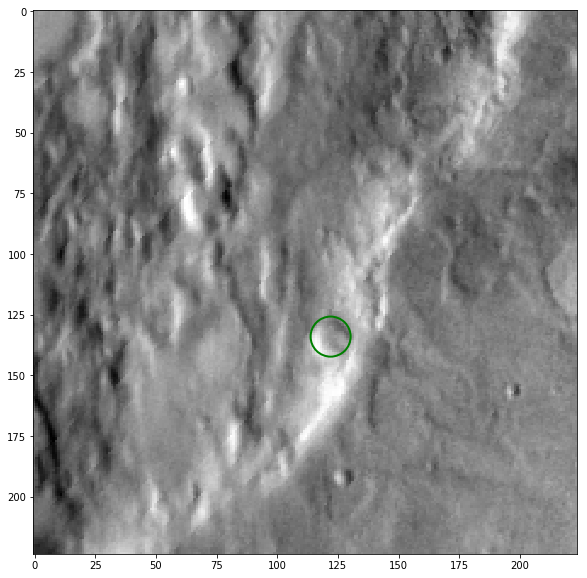

In [112]:
transform = Grayscale(num_output_channels=1)
to_image = ToPILImage()
to_tensor = ToTensor()

to_plot = to_tensor(transform(to_image(X[image_idx]))).squeeze(0)

import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(to_plot, cmap=plt.cm.gray)

# Draw the predicted boxes in red
for y, x, r in true_circles:
    ax.add_patch(plt.Circle(
        (x, y), r, color='green', fill=False, linewidth=2))
true_circles